# Load Data

In [1]:
# Connect to gdrive and copy the model over
from google.colab import drive
drive.mount('/gdrive')


Mounted at /gdrive


In [2]:
!rm -r singles.zip singles/

!cp "/gdrive/MyDrive/traina/hdr/singles_iter4.zip" singles.zip

import zipfile
import io
zf = zipfile.ZipFile('/content/singles.zip', "r")
zf.extractall('singles')

rm: cannot remove 'singles.zip': No such file or directory
rm: cannot remove 'singles/': No such file or directory


### create singles dataset

In [3]:
# !pip install split-folders

In [4]:
# import splitfolders
# splitfolders.ratio('/content/singles/content/hdr/singles', output="data", seed=1337, ratio=(.8, 0.2))

In [5]:
# from torchvision.datasets import VisionDataset

# from PIL import Image
# import numpy as np

# import os
# import os.path


# def has_file_allowed_extension(filename, extensions):
#     """Checks if a file is an allowed extension.

#     Args:
#         filename (string): path to a file
#         extensions (tuple of strings): extensions to consider (lowercase)

#     Returns:
#         bool: True if the filename ends with one of given extensions
#     """
#     return filename.lower().endswith(extensions)


# def is_image_file(filename):
#     """Checks if a file is an allowed image extension.

#     Args:
#         filename (string): path to a file

#     Returns:
#         bool: True if the filename ends with a known image extension
#     """
#     return has_file_allowed_extension(filename, IMG_EXTENSIONS)


# def make_dataset(directory, class_to_idx, extensions=None, is_valid_file=None):
#     instances = []
#     directory = os.path.expanduser(directory)
#     both_none = extensions is None and is_valid_file is None
#     both_something = extensions is not None and is_valid_file is not None
#     if both_none or both_something:
#         raise ValueError("Both extensions and is_valid_file cannot be None or not None at the same time")
#     if extensions is not None:
#         def is_valid_file(x):
#             return has_file_allowed_extension(x, extensions)
#     for target_class in sorted(class_to_idx.keys()):
#         class_index = class_to_idx[target_class]
#         target_dir = os.path.join(directory, target_class)
#         if not os.path.isdir(target_dir):
#             continue
#         for root, _, fnames in sorted(os.walk(target_dir, followlinks=True)):
#             for fname in sorted(fnames):
#                 path = os.path.join(root, fname)
#                 if is_valid_file(path):
#                     item = path, class_index
#                     instances.append(item)
#     return instances


# class DatasetFolderARGB(VisionDataset):
#     """A generic data loader where the samples are arranged in this way: ::

#         root/class_x/xxx.ext
#         root/class_x/xxy.ext
#         root/class_x/xxz.ext

#         root/class_y/123.ext
#         root/class_y/nsdf3.ext
#         root/class_y/asd932_.ext

#     Args:
#         root (string): Root directory path.
#         loader (callable): A function to load a sample given its path.
#         extensions (tuple[string]): A list of allowed extensions.
#             both extensions and is_valid_file should not be passed.
#         transform (callable, optional): A function/transform that takes in
#             a sample and returns a transformed version.
#             E.g, ``transforms.RandomCrop`` for images.
#         target_transform (callable, optional): A function/transform that takes
#             in the target and transforms it.
#         is_valid_file (callable, optional): A function that takes path of a file
#             and check if the file is a valid file (used to check of corrupt files)
#             both extensions and is_valid_file should not be passed.

#      Attributes:
#         classes (list): List of the class names sorted alphabetically.
#         class_to_idx (dict): Dict with items (class_name, class_index).
#         samples (list): List of (sample path, class_index) tuples
#         targets (list): The class_index value for each image in the dataset
#     """

#     def __init__(self, root, loader, extensions=None, transform=None,
#                  target_transform=None, is_valid_file=None):
#         super(DatasetFolderARGB, self).__init__(root, transform=transform,
#                                             target_transform=target_transform)
#         classes, class_to_idx = self._find_classes(self.root)
#         samples = make_dataset(self.root, class_to_idx, extensions, is_valid_file)
#         if len(samples) == 0:
#             msg = "Found 0 files in subfolders of: {}\n".format(self.root)
#             if extensions is not None:
#                 msg += "Supported extensions are: {}".format(",".join(extensions))
#             raise RuntimeError(msg)

#         self.loader = loader
#         self.extensions = extensions

#         self.classes = classes
#         self.class_to_idx = class_to_idx
#         self.samples = samples
#         self.targets = [s[1] for s in samples]

#     def _find_classes(self, dir):
#         """
#         Finds the class folders in a dataset.

#         Args:
#             dir (string): Root directory path.

#         Returns:
#             tuple: (classes, class_to_idx) where classes are relative to (dir), and class_to_idx is a dictionary.

#         Ensures:
#             No class is a subdirectory of another.
#         """
#         classes = [d.name for d in os.scandir(dir) if d.is_dir()]
#         classes.sort()
#         class_to_idx = {cls_name: i for i, cls_name in enumerate(classes)}
#         return classes, class_to_idx

#     def __getitem__(self, index):
#         """
#         Args:
#             index (int): Index

#         Returns:
#             tuple: (sample, target) where target is class_index of the target class.
#         """
#         path, target = self.samples[index]
#         print(path, target)
#         sample = self.loader(path)
#         # if self.transform is not None:
#         #     sample = self.transform(sample)
#         # if self.target_transform is not None:
#         #     target = self.target_transform(target)


#         # convert from 4 channel argb PIL image to tensor
#         print(type(sample))
#         np_sample = np.array(sample)
#         tensor_sample = torch.from_numpy(np_sample)

#         return tensor_sample, target

#     def __len__(self):
#         return len(self.samples)


# IMG_EXTENSIONS = ('.jpg', '.jpeg', '.png', '.ppm', '.bmp', '.pgm', '.tif', '.tiff', '.webp')


# def pil_loader(path):
#     # open path as file to avoid ResourceWarning (https://github.com/python-pillow/Pillow/issues/835)
#     with open(path, 'rb') as f:
#         img = Image.open(f)
#         # do not convert from argb to grb - all the layers are actaully images
#         return img # .convert('RGB')


# def accimage_loader(path):
#     import accimage
#     try:
#         return accimage.Image(path)
#     except IOError:
#         # Potentially a decoding problem, fall back to PIL.Image
#         return pil_loader(path)


# def default_loader(path):
#     from torchvision import get_image_backend
#     if get_image_backend() == 'accimage':
#         print('acd_loader')
#         return accimage_loader(path)
#     else:
#         return pil_loader(path)


# class ImageFolderARGB(DatasetFolderARGB):
#     """A generic data loader where the images are arranged in this way: ::

#         root/dog/xxx.png
#         root/dog/xxy.png
#         root/dog/xxz.png

#         root/cat/123.png
#         root/cat/nsdf3.png
#         root/cat/asd932_.png

#     Args:
#         root (string): Root directory path.
#         transform (callable, optional): A function/transform that  takes in an PIL image
#             and returns a transformed version. E.g, ``transforms.RandomCrop``
#         target_transform (callable, optional): A function/transform that takes in the
#             target and transforms it.
#         loader (callable, optional): A function to load an image given its path.
#         is_valid_file (callable, optional): A function that takes path of an Image file
#             and check if the file is a valid file (used to check of corrupt files)

#      Attributes:
#         classes (list): List of the class names sorted alphabetically.
#         class_to_idx (dict): Dict with items (class_name, class_index).
#         imgs (list): List of (image path, class_index) tuples
#     """

#     def __init__(self, root, transform=None, target_transform=None,
#                  loader=default_loader, is_valid_file=None):
#         super(ImageFolderARGB, self).__init__(root, loader, IMG_EXTENSIONS if is_valid_file is None else None,
#                                           transform=transform,
#                                           target_transform=target_transform,
#                                           is_valid_file=is_valid_file)
#         self.imgs = self.samples

In [6]:
# Data augmentation and normalization for training
# Just normalization for validation

from torchvision import datasets, models
import torchvision.transforms.v2 as tf
import torch

from torch.utils.data.sampler import SubsetRandomSampler
import numpy as np

data_transforms = {
    'train': tf.Compose([
        #transforms.CenterCrop(128),
        #transforms.RandomAffine(degrees=(0, 20), translate=(0, 0), scale=(0.85, 1.15)),
        # tf.RandomRotated(   180   ),
        tf.RandomHorizontalFlip(),
        tf.RandomVerticalFlip(),
        #tf.ScaleJitter((0.75,1.25)),
        # transforms.RandomPosterize(bits = 2),
        # transforms.RandomAdjustSharpness(sharpness_factor=2),
        # transforms.RandomAutocontrast(),
        # transforms.AutoAugment(transforms.AutoAugmentPolicy.CIFAR10),
        tf.RandomRotation(degrees=(0, 180)),
        tf.ToTensor(),
        #tf.Normalize([0.5, 0.5, 0.5], [0.25, .25, 0.25])
    ]),
    'val': tf.Compose([
        #transforms.CenterCrop(128),
        tf.ToTensor(),
        #tf.Normalize([0.5, 0.5, 0.5], [0.25, .25, 0.25])
    ]),
}

data_dir = '/content/singles/content/singles_iter4'
image_dataset = { x : datasets.ImageFolder(data_dir, data_transforms[x])
                  for x in ['train', 'val']}

validation_split = .2
shuffle_dataset = True
random_seed= 42
batch_size = 300

# Creating data indices for training and validation splits:
dataset_size = len(image_dataset['train'])
print(dataset_size)
indices = list(range(dataset_size))
split = int(np.floor(validation_split * dataset_size))
if shuffle_dataset :
    np.random.seed(random_seed)
    np.random.shuffle(indices)
train_indices, val_indices = indices[split:], indices[:split]

indices = {
    'train' : train_indices,
    'val' : val_indices,
}
print(len(indices['train']), len(indices['val']))

# # Creating PT data samplers and loaders:
# train_sampler = SubsetRandomSampler(train_indices)
# valid_sampler = SubsetRandomSampler(val_indices)

samplers = {x: SubsetRandomSampler(indices[x]) for x in ['train', 'val']}

# dataloaders = {
#   'train' : torch.utils.data.DataLoader(image_dataset, batch_size=batch_size,
#                                         sampler=train_sampler,
#                                         num_workers=2 ),
#   'val' : torch.utils.data.DataLoader(image_dataset,
#                                       batch_size=batch_size,
#                                       sampler=valid_sampler,
#                                       num_workers=2 ),
# }


dataloaders = {x: torch.utils.data.DataLoader(image_dataset[x], batch_size=batch_size,
                                             sampler=samplers[x], num_workers=2)
              for x in ['train', 'val']}

dataset_sizes = {x: len(dataloaders[x]) for x in ['train', 'val']}
print(dataset_sizes)

class_names = image_dataset['train'].classes
print(class_names)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#device = "cpu"

16219
12976 3243
{'train': 44, 'val': 11}
['clean', 'maybe', 'pit']


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/v2/_deprecated.py:43: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.
  warnings.warn(


In [7]:
print(len(image_dataset['train']))

16219


In [8]:
im = image_dataset['train'][37]

im

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],
 
         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],
 
         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]),
 0)

### Visualize a few images
Let's visualize a few training images so as to understand the data
augmentations.



tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
        

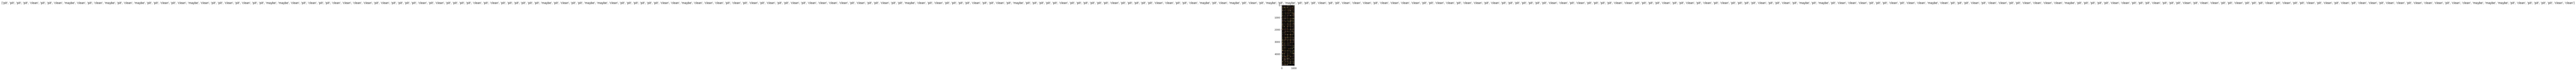

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])

In [9]:
import os
from PIL import Image
import torchvision.transforms.functional as TF
import torchvision
import matplotlib.pyplot as plt

def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    #mean = np.array([0.485, 0.456, 0.406])
    #std = np.array([0.229, 0.224, 0.225])
    #inp = std * inp + mean
    #inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))
print(inputs)

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

out

## Training the model

Now, let's write a general function to train a model. Here, we will
illustrate:

-  Scheduling the learning rate
-  Saving the best model

In the following, parameter ``scheduler`` is an LR scheduler object from
``torch.optim.lr_scheduler``.



In [10]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:4f}')

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

### Visualizing the model predictions

Generic function to display predictions for a few images




In [11]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            print(outputs)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title(f'predicted: {class_names[preds[j]]}')
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

## Finetuning the convnet

Load a pretrained model and reset final fully connected layer.




In [12]:
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import time
import os
import copy
import torch

model_ft = models.resnet50(pretrained=True)
# model_ft = models.mobilenet_v3_large(num_classes = 2)


num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model_ft.fc = nn.Linear(num_ftrs, 3)

print(torch.cuda.is_available())
model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

#Observe that all parameters are being optimized
# optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# params = model_ft.parameters()
optimizer_ft = optim.Adam(model_ft.parameters())

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=5, gamma=0.1)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 163MB/s]


True


### Train and evaluate

It should take around 15-25 min on CPU. On GPU though, it takes less than a
minute.




In [14]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=15)

Epoch 0/14
----------
train Loss: 88.1454 Acc: 264.0909
val Loss: 92.3158 Acc: 264.9091

Epoch 1/14
----------
train Loss: 75.4008 Acc: 267.6591
val Loss: 95.4569 Acc: 260.2727

Epoch 2/14
----------
train Loss: 68.6011 Acc: 270.0682
val Loss: 81.5601 Acc: 266.3636

Epoch 3/14
----------
train Loss: 63.6877 Acc: 271.7273
val Loss: 64.6644 Acc: 271.0909

Epoch 4/14
----------
train Loss: 59.8682 Acc: 273.1591
val Loss: 63.8980 Acc: 271.4545

Epoch 5/14
----------
train Loss: 52.9440 Acc: 275.4318
val Loss: 52.0998 Acc: 275.5455

Epoch 6/14
----------
train Loss: 51.0617 Acc: 275.8182
val Loss: 51.8277 Acc: 275.0909

Epoch 7/14
----------
train Loss: 48.9715 Acc: 276.6591
val Loss: 50.8116 Acc: 275.1818

Epoch 8/14
----------
train Loss: 49.8980 Acc: 276.2955
val Loss: 52.7122 Acc: 275.9091

Epoch 9/14
----------
train Loss: 49.0099 Acc: 276.7500
val Loss: 50.0726 Acc: 275.7273

Epoch 10/14
----------
train Loss: 47.6767 Acc: 276.7500
val Loss: 49.5923 Acc: 276.2727

Epoch 11/14
--------

tensor([[-7.1870e+00, -2.3175e+00,  6.8047e+00],
        [ 1.3071e+00,  1.5013e+00, -3.5967e+00],
        [ 5.0546e+00,  4.1575e-01, -6.9386e+00],
        [-4.7316e+00, -7.1168e-01,  3.7756e+00],
        [-5.9336e+00, -2.2032e-01,  4.4571e+00],
        [ 4.2011e+00,  6.1909e-01, -6.1185e+00],
        [ 9.7224e-01,  1.0271e+00, -2.6736e+00],
        [ 2.2278e+00,  1.2171e+00, -4.3452e+00],
        [ 3.3929e+00,  5.6069e-01, -5.0468e+00],
        [ 1.2447e+00,  1.1046e+00, -3.0683e+00],
        [-7.3535e+00, -1.6799e+00,  6.5043e+00],
        [-6.8802e+00, -1.6906e+00,  6.1485e+00],
        [-6.0940e+00, -7.8996e-01,  4.9497e+00],
        [-6.5773e+00, -1.3323e+00,  5.6827e+00],
        [-6.7349e+00, -1.3639e+00,  5.8343e+00],
        [-3.7441e+00, -9.2439e-02,  2.5838e+00],
        [-5.0658e+00, -8.0770e-01,  4.1488e+00],
        [-5.4725e+00, -6.6725e-01,  4.3831e+00],
        [ 4.4346e+00,  6.1462e-01, -6.3944e+00],
        [ 3.7642e+00,  6.8555e-01, -5.6662e+00],
        [-7.0340e+00

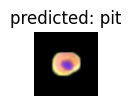

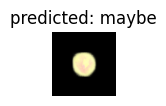

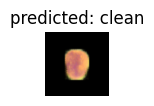

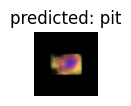

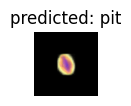

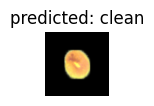

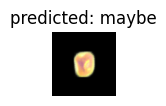

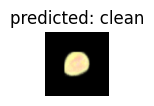

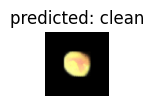

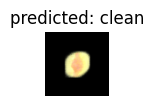

In [15]:
visualize_model(model_ft, num_images=10)

It would be nice to view the dataset with fiftyone, but that is still a work in progress right now

In [16]:
# from google.colab import drive
# drive.mount('/gdrive')

path =  'classification.pt'
torch.save(model_ft.state_dict(), path)

import time
timestr = time.strftime("%Y%m%d-%H%M%S")

filename = 'classification-{0}.pt'.format(timestr)

!cp classification.pt /content/drive/MyDrive/classification-2_25_2024.pt


cp: cannot create regular file '/content/drive/MyDrive/classification-2_25_2024.pt': No such file or directory


In [17]:
pip install fiftyone

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 31.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.9/108.9 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 677.2/677.2 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.5/192.5 kB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.6/89.6 kB 12.2 MB/s eta 0:00:00
  Preparing metadata (setup

In [18]:
import fiftyone as fo
from fiftyone import ViewField as F

Migrating database to v0.23.5


INFO:fiftyone.migrations.runner:Migrating database to v0.23.5


In [19]:

samples = []

def add_to_fiddy(input, label, ouput, pred, conf, confs, img_path, dataset_type):
    global samples

    # add to counts
    split_1 = img_path[0].split('.')[0]
    print(split_1)
    this_type = split_1.split('_')[3]

    # if(this_type == 'pit'):
    #   label = 2
    # else:
    #   label = 0

    print(label, ouput, pred, conf, confs, img_path[0])
    sample = fo.Sample(filepath=img_path[0],  tags=[dataset_type])

    classes = ['cherry_clean', 'cherry_maybe', 'cherry_pit']

    sample["ground_truth"] = fo.Classification(label=classes[label])
    sample["prediction"] = fo.Classification(label=classes[pred], confidence=conf)

    samples.append(sample)


def evaluate_model(model, num_images=6, dataset_type='val'):

    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()
    m = nn.Softmax(dim=1)

    with torch.no_grad():

        dl = dataloaders[dataset_type]
        for i, (inputs, labels) in enumerate(dl):
            inputs = inputs.to(device)
            labels = labels.to(device)

            images = dl.dataset.imgs[i*300:(i+1)*300]

            #print(inputs)
            outputs = model(inputs)
            confs = m(outputs)
            index, preds = torch.max(confs, 1)



            #print(outputs)

            for j in range(inputs.size()[0]):

                add_to_fiddy(
                    inputs[j].cpu().numpy(),
                    labels[j].cpu().numpy(),
                    outputs[j].cpu().numpy(),
                    preds[j].cpu().numpy(),
                    index[j].cpu().numpy(),
                    confs[j].cpu().numpy(),
                    images[j],
                    dataset_type)

                images_so_far += 1
                # ax = plt.subplot(num_images//2, 2, images_so_far)
                # ax.axis('off')
                # ax.set_title(f'predicted: {class_names[preds[j]]}')
                # imshow(inputs.cpu().data[j])



                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)


evaluate_model(model_ft, 20000, dataset_type='val')
evaluate_model(model_ft, 20000, dataset_type='train')



Streaming output truncated to the last 5000 lines.
/content/singles/content/singles_iter4/pit/organic_10637496-013_pit
2 [-6.5333023 -1.688374   5.8438163] 2 0.9994605 [4.211639e-06 5.352750e-04 9.994605e-01] /content/singles/content/singles_iter4/pit/organic_10637496-013_pit.png
/content/singles/content/singles_iter4/pit/organic_10637496-015_pit
0 [ 4.629619    0.16115035 -6.1141553 ] 0 0.988644 [9.8864400e-01 1.1334665e-02 2.1334281e-05] /content/singles/content/singles_iter4/pit/organic_10637496-015_pit.png
/content/singles/content/singles_iter4/pit/organic_10637496-016_pit
2 [-5.841339  -0.9821174  4.88666  ] 2 0.99715984 [2.1860202e-05 2.8182999e-03 9.9715984e-01] /content/singles/content/singles_iter4/pit/organic_10637496-016_pit.png
/content/singles/content/singles_iter4/pit/organic_10637496-017_pit
0 [ 4.653716    0.78605664 -6.903274  ] 0 0.97951174 [9.7951174e-01 2.0478891e-02 9.3728750e-06] /content/singles/content/singles_iter4/pit/organic_10637496-017_pit.png
/content/sing

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [20]:
dataset = fo.Dataset("cherry-class-dataset")
#dataset = fo.load_dataset("cherry-classification-dataset")
dataset.clear()
dataset.add_samples(samples)


 100% |█████████████| 16219/16219 [9.0s elapsed, 0s remaining, 1.8K samples/s]      


INFO:eta.core.utils: 100% |█████████████| 16219/16219 [9.0s elapsed, 0s remaining, 1.8K samples/s]      


['65dc1f3950428422a5f6f2de',
 '65dc1f3950428422a5f6f2df',
 '65dc1f3950428422a5f6f2e0',
 '65dc1f3950428422a5f6f2e1',
 '65dc1f3950428422a5f6f2e2',
 '65dc1f3950428422a5f6f2e3',
 '65dc1f3950428422a5f6f2e4',
 '65dc1f3950428422a5f6f2e5',
 '65dc1f3950428422a5f6f2e6',
 '65dc1f3950428422a5f6f2e7',
 '65dc1f3950428422a5f6f2e8',
 '65dc1f3950428422a5f6f2e9',
 '65dc1f3950428422a5f6f2ea',
 '65dc1f3950428422a5f6f2eb',
 '65dc1f3950428422a5f6f2ec',
 '65dc1f3950428422a5f6f2ed',
 '65dc1f3950428422a5f6f2ee',
 '65dc1f3950428422a5f6f2ef',
 '65dc1f3950428422a5f6f2f0',
 '65dc1f3950428422a5f6f2f1',
 '65dc1f3950428422a5f6f2f2',
 '65dc1f3950428422a5f6f2f3',
 '65dc1f3950428422a5f6f2f4',
 '65dc1f3950428422a5f6f2f5',
 '65dc1f3950428422a5f6f2f6',
 '65dc1f3950428422a5f6f2f7',
 '65dc1f3950428422a5f6f2f8',
 '65dc1f3950428422a5f6f2f9',
 '65dc1f3950428422a5f6f2fa',
 '65dc1f3950428422a5f6f2fb',
 '65dc1f3950428422a5f6f2fc',
 '65dc1f3950428422a5f6f2fd',
 '65dc1f3950428422a5f6f2fe',
 '65dc1f3950428422a5f6f2ff',
 '65dc1f395042

In [21]:

#fo.load_dataset()
fo.close_app()
session = fo.launch_app(dataset)


Welcome to

███████╗██╗███████╗████████╗██╗   ██╗ ██████╗ ███╗   ██╗███████╗
██╔════╝██║██╔════╝╚══██╔══╝╚██╗ ██╔╝██╔═══██╗████╗  ██║██╔════╝
█████╗  ██║█████╗     ██║    ╚████╔╝ ██║   ██║██╔██╗ ██║█████╗
██╔══╝  ██║██╔══╝     ██║     ╚██╔╝  ██║   ██║██║╚██╗██║██╔══╝
██║     ██║██║        ██║      ██║   ╚██████╔╝██║ ╚████║███████╗
╚═╝     ╚═╝╚═╝        ╚═╝      ╚═╝    ╚═════╝ ╚═╝  ╚═══╝╚══════╝ v0.23.5

If you're finding FiftyOne helpful, here's how you can get involved:

|
|  ⭐⭐⭐ Give the project a star on GitHub ⭐⭐⭐
|  https://github.com/voxel51/fiftyone
|
|  🚀🚀🚀 Join the FiftyOne Slack community 🚀🚀🚀
|  https://slack.voxel51.com
|



INFO:fiftyone.core.session.session:
Welcome to

███████╗██╗███████╗████████╗██╗   ██╗ ██████╗ ███╗   ██╗███████╗
██╔════╝██║██╔════╝╚══██╔══╝╚██╗ ██╔╝██╔═══██╗████╗  ██║██╔════╝
█████╗  ██║█████╗     ██║    ╚████╔╝ ██║   ██║██╔██╗ ██║█████╗
██╔══╝  ██║██╔══╝     ██║     ╚██╔╝  ██║   ██║██║╚██╗██║██╔══╝
██║     ██║██║        ██║      ██║   ╚██████╔╝██║ ╚████║███████╗
╚═╝     ╚═╝╚═╝        ╚═╝      ╚═╝    ╚═════╝ ╚═╝  ╚═══╝╚══════╝ v0.23.5

If you're finding FiftyOne helpful, here's how you can get involved:

|
|  ⭐⭐⭐ Give the project a star on GitHub ⭐⭐⭐
|  https://github.com/voxel51/fiftyone
|
|  🚀🚀🚀 Join the FiftyOne Slack community 🚀🚀🚀
|  https://slack.voxel51.com
|



In [22]:

# Evaluate the objects in the `predictions` field with respect to the
# objects in the `ground_truth` field
results = dataset.evaluate_classifications(
    "prediction",

)



In [23]:

# # Get the 10 most common classes in the dataset
# counts = dataset.count_values("ground_truth.detections.label")
# classes = sorted(counts, key=counts.get, reverse=True)[:2]

# # Print a classification report for the top-10 classes
# results.print_report(classes=classes)

In [24]:
plot = results.plot_confusion_matrix(classes=['cherry_clean', 'cherry_pit', 'cherry_maybe'])
plot.show()

# Connect to session
session.plots.attach(plot)

/usr/local/lib/python3.10/dist-packages/fiftyone/core/plots/plotly.py:1575: UserWarning:

Interactive plots are currently only supported in Jupyter notebooks. Support outside of notebooks and in Google Colab and Databricks will be included in an upcoming release. In the meantime, you can still use this plot, but note that (i) selecting data will not trigger callbacks, and (ii) you must manually call `plot.show()` to launch a new plot that reflects the current state of an attached session.

See https://docs.voxel51.com/user_guide/plots.html#working-in-notebooks for more information.



In [25]:
results.print_report()


              precision    recall  f1-score   support

cherry_clean       0.92      0.98      0.95      6603
cherry_maybe       0.69      0.41      0.52      1210
  cherry_pit       0.98      0.99      0.98      8406

    accuracy                           0.94     16219
   macro avg       0.86      0.79      0.82     16219
weighted avg       0.93      0.94      0.94     16219



In [26]:
plot.freeze()

In [27]:
# Show most INCORRECT predictions on validation split
session.view = (
    dataset
    .match_tags("val")
    .match(F("predictions.label") != F("ground_truth.label"))
)

In [28]:
VAL_view = (
    dataset
    .match_tags("val")
)


# Evaluate the objects in the `predictions` field with respect to the
# objects in the `ground_truth` field
results = VAL_view.evaluate_classifications(
    "prediction",

)

plot = results.plot_confusion_matrix(classes=['cherry_clean', 'cherry_pit'])
plot.show()

# Connect to session
session.plots.attach(plot)

/usr/local/lib/python3.10/dist-packages/fiftyone/core/plots/plotly.py:1575: UserWarning:

Interactive plots are currently only supported in Jupyter notebooks. Support outside of notebooks and in Google Colab and Databricks will be included in an upcoming release. In the meantime, you can still use this plot, but note that (i) selecting data will not trigger callbacks, and (ii) you must manually call `plot.show()` to launch a new plot that reflects the current state of an attached session.

See https://docs.voxel51.com/user_guide/plots.html#working-in-notebooks for more information.



In [29]:
results.print_report()


              precision    recall  f1-score   support

cherry_clean       0.92      0.97      0.95      1328
cherry_maybe       0.64      0.40      0.49       234
  cherry_pit       0.98      0.99      0.98      1681

    accuracy                           0.94      3243
   macro avg       0.85      0.79      0.81      3243
weighted avg       0.93      0.94      0.93      3243



In [30]:
iteration = 5

si = 'singles_iter{}'.format(iteration)
si_pit = '{}/pit'.format(si)
si_clean = '{}/clean'.format(si)
si_maybe = '{}/maybe'.format(si)

if not os.path.exists(si):
    os.makedirs(si)
if not os.path.exists(si_pit):
    os.makedirs(si_pit)
if not os.path.exists(si_clean):
    os.makedirs(si_clean)
if not os.path.exists(si_maybe):
    os.makedirs(si_maybe)

In [33]:
normal_trans = data_transforms['val']

import shutil

iteration_source = '/content/singles_iter5'

if not os.path.exists(iteration_source):
    os.makedirs(iteration_source)

counts = np.array([[0,0,0], [0,0,0]], np.int32)

def sort_for_maybe(img_path, img_name, cherry_type):
  pil_path = os.path.join(img_path, img_name)

  img_pil = Image.open(pil_path)
  img = normal_trans(img_pil).float()
  #print(img)
  pred = model_ft(img.cuda().unsqueeze(0))
  _, preds = torch.max(pred, 1)


  # add to counts
  split_1 = img_name.split('.')[0]
  this_type = split_1.split('_')[2]
  print(this_type)

  if (this_type == 'clean'):
    counts[0][preds] = counts[0][preds] + 1
  else:
    counts[1][preds] = counts[1][preds] + 1

  #print(preds)
  if(cherry_type == 'pit'):
    if (preds == 2):
      print('pit', 'pit')
      dest_dir = os.path.join(iteration_source, 'pit')
    else:
      print('pit', 'maybe')
      dest_dir = os.path.join(iteration_source, 'maybe')

  if(cherry_type == 'clean'):
    if (preds == 0):
      print('clean', 'clean')
      dest_dir = os.path.join(iteration_source, 'clean')
    else:
      print('clean', 'maybe')
      dest_dir = os.path.join(iteration_source, 'maybe')

  if(cherry_type == 'maybe'):

    print('maybe img type: '.format(this_type))

    if (preds == 1):
      print('maybe', 'maybe')
      dest_dir = os.path.join(iteration_source, 'maybe')

    if (preds == 0):
      if (this_type == 'clean'):
        print('maybe-{}'.format(this_type), 'clean')
        dest_dir = os.path.join(iteration_source, 'clean')
      else:
        print('maybe-{}'.format(this_type), 'maybe', 'bad!!!')
        dest_dir = os.path.join(iteration_source, 'maybe')

    if (preds == 2):
      if (this_type == 'pit'):
        print('maybe-{}'.format(this_type), 'pit')
        dest_dir = os.path.join(iteration_source,'pit')
      else:
        print('maybe-{}'.format(this_type), 'maybe',  'bad!!!')
        dest_dir = os.path.join(iteration_source, 'maybe' )

  print(pil_path, os.path.join(dest_dir, img_name))
  shutil.copyfile(pil_path, os.path.join(dest_dir, img_name))


img, tgt = image_dataset['train'][0]

sort_for_maybe('/content/singles/content/singles_iter4/maybe', 'natural_10438856-006_pit.png', 'maybe')

print(counts)

pit
maybe img type: 
maybe-pit maybe bad!!!
/content/singles/content/singles_iter4/maybe/natural_10438856-006_pit.png /content/singles_iter5/maybe/natural_10438856-006_pit.png
[[0 0 0]
 [1 0 0]]


In [34]:
counts = np.array([[0,0,0], [0,0,0]], np.int32)

dir_and_type = [
    ('/content/singles/content/singles_iter{}/maybe/'.format(4),'maybe'),
    ('/content/singles/content/singles_iter{}/clean/'.format(4),'clean'),
    ('/content/singles/content/singles_iter{}/pit/'.format(4),'pit'),
]

for dt in dir_and_type:
  for file in os.listdir(dt[0]):
    sort_for_maybe(dt[0], file, dt[1])

Streaming output truncated to the last 5000 lines.
pit pit
/content/singles/content/singles_iter4/pit/sulfur_10521177-010_pit.png /content/singles_iter5/pit/sulfur_10521177-010_pit.png
pit
pit pit
/content/singles/content/singles_iter4/pit/natural_10441721-003_pit.png /content/singles_iter5/pit/natural_10441721-003_pit.png
pit
pit pit
/content/singles/content/singles_iter4/pit/sulfur_10546580-002_pit.png /content/singles_iter5/pit/sulfur_10546580-002_pit.png
pit
pit pit
/content/singles/content/singles_iter4/pit/sulfur_10564725-004_pit.png /content/singles_iter5/pit/sulfur_10564725-004_pit.png
pit
pit pit
/content/singles/content/singles_iter4/pit/organic_10640934-019_pit.png /content/singles_iter5/pit/organic_10640934-019_pit.png
pit
pit pit
/content/singles/content/singles_iter4/pit/sulfur_10523851-019_pit.png /content/singles_iter5/pit/sulfur_10523851-019_pit.png
pit
pit pit
/content/singles/content/singles_iter4/pit/organic_10637687-016_pit.png /content/singles_iter5/pit/organic_10

In [35]:
!zip -r /content/singles_iter5.zip /content/singles_iter5
!cp /content/singles_iter5.zip /gdrive/MyDrive/traina/hdr/singles_iter5.zip

Streaming output truncated to the last 5000 lines.
  adding: content/singles_iter5/clean/sulfur_10591274-016_clean.png (deflated 1%)
  adding: content/singles_iter5/clean/organic_10684100-008_clean.png (deflated 1%)
  adding: content/singles_iter5/clean/organic_10684100-050_clean.png (deflated 1%)
  adding: content/singles_iter5/clean/organic_10690403-005_clean.png (deflated 1%)
  adding: content/singles_iter5/clean/natural_10492145-075_clean.png (deflated 1%)
  adding: content/singles_iter5/clean/sulfur_10593184-012_clean.png (deflated 1%)
  adding: content/singles_iter5/clean/organic_10685628-061_clean.png (deflated 1%)
  adding: content/singles_iter5/clean/natural_10494246-067_clean.png (deflated 1%)
  adding: content/singles_iter5/clean/organic_10685437-067_clean.png (deflated 1%)
  adding: content/singles_iter5/clean/natural_10489662-048_clean.png (deflated 1%)
  adding: content/singles_iter5/clean/organic_10695751-044_clean.png (deflated 1%)
  adding: content/singles_iter5/clean/

In [36]:
!ls -la

total 281600
drwxr-xr-x 1 root root     4096 Feb 26 05:26 .
drwxr-xr-x 1 root root     4096 Feb 26 05:11 ..
-rw-r--r-- 1 root root 94376590 Feb 26 05:17 classification.pt
drwxr-xr-x 4 root root     4096 Feb 22 14:24 .config
drwxr-xr-x 1 root root     4096 Feb 22 14:24 sample_data
drwxr-xr-x 3 root root     4096 Feb 26 05:11 singles
drwxr-xr-x 5 root root     4096 Feb 26 05:19 singles_iter5
-rw-r--r-- 1 root root 96971098 Feb 26 05:26 singles_iter5.zip
-rw------- 1 root root 96970886 Feb 26 05:11 singles.zip


In [37]:
counts

array([[6483,  346,  166],
       [ 506,  365, 8353]], dtype=int32)

In [38]:
count_pits = np.sum(counts[0])
count_clean = np.sum(counts[1])

pits_percentages = counts[0] / count_pits
clean_percentages = counts[1] / count_clean

In [39]:
pits_percentages

array([0.92680486, 0.0494639 , 0.02373124])

In [40]:
clean_percentages

array([0.0548569 , 0.03957069, 0.90557242])